In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from crk87 import rk_defect_control

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control(model, t_span, y0[0], tol)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

nsteps = 14
nsuccessful_steps = 14
integration complete


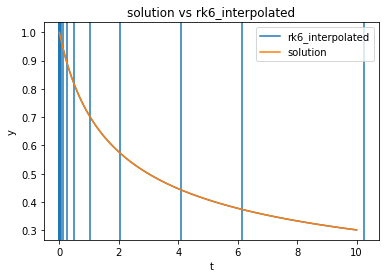

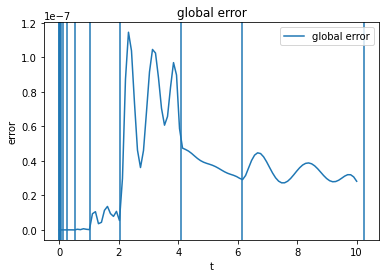

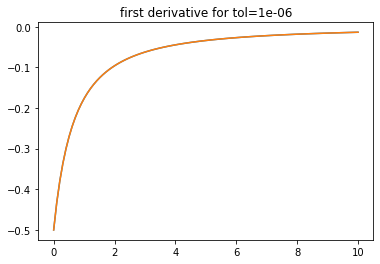

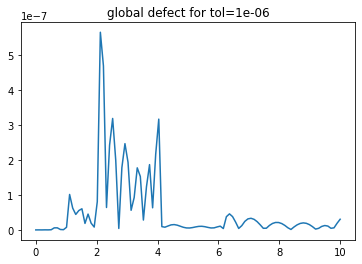

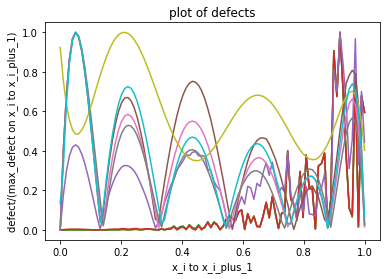

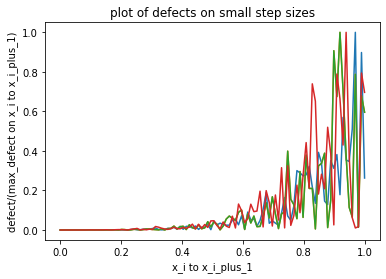

0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
6.661338147750939e-16
3.774758283725532e-15
7.631673071273326e-13
1.0214251666695873e-10
4.127976072076933e-09
4.795599745088808e-08
2.9176832005983755e-08
2.174028240764514e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

nsteps = 19
nsuccessful_steps = 18
integration complete


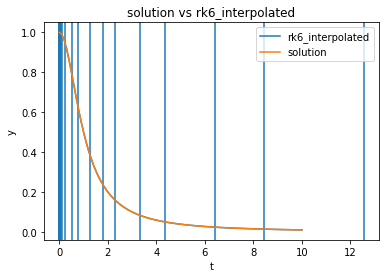

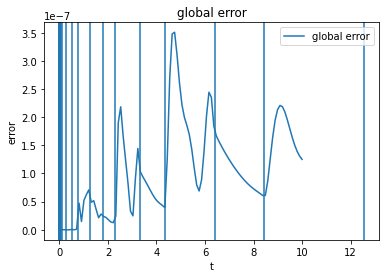

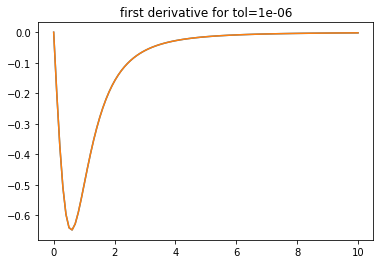

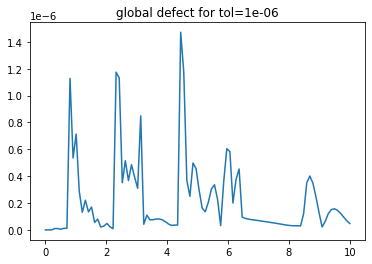

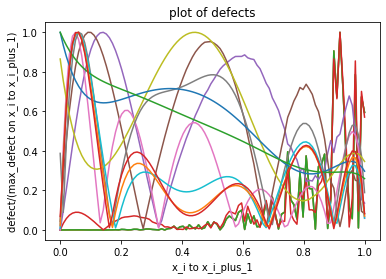

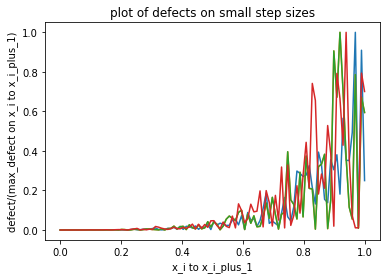

0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.4876988529977098e-13
5.201292729850593e-10
4.409568266083852e-10
4.424955218906845e-08
2.4477740584449847e-08
1.1282936668299826e-08
1.038240538403512e-07
3.8993004172760415e-08
1.733056715497172e-07
5.8851248778760135e-08
1.0372225100509225e-07


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

nsteps = 14
nsuccessful_steps = 14
integration complete


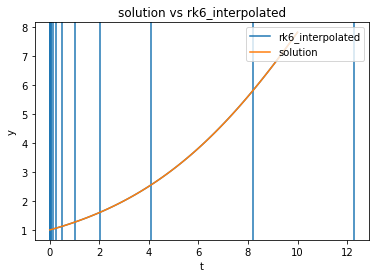

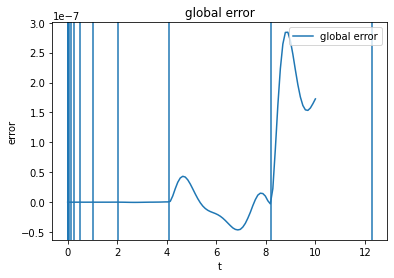

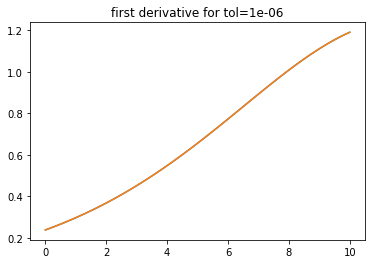

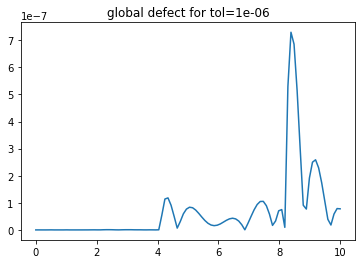

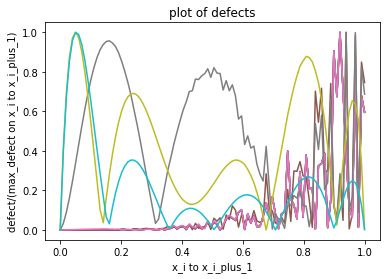

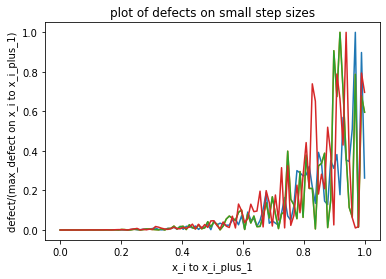

0.0
2.220446049250313e-16
0.0
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
2.220446049250313e-16
1.1102230246251565e-15
2.6645352591003757e-15
9.325873406851315e-15
8.076650459543089e-12
4.706611100857572e-09
1.66571375359581e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

nsteps = 802
nsuccessful_steps = 624
integration complete


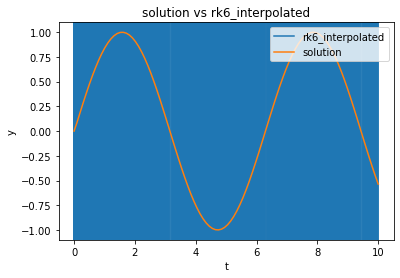

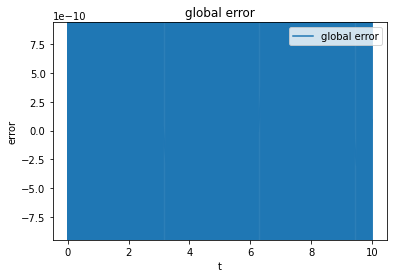

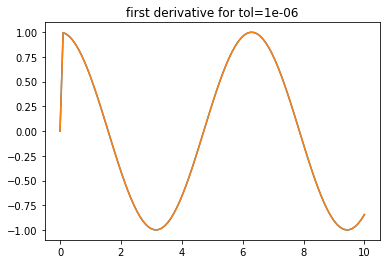

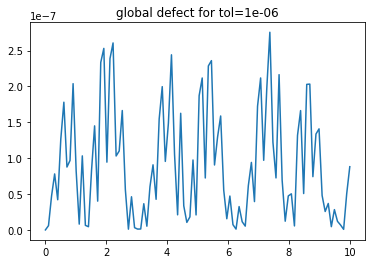

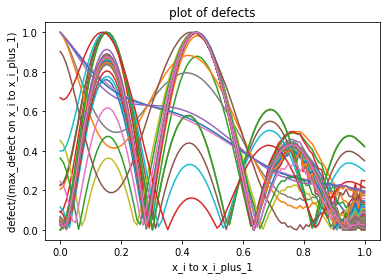

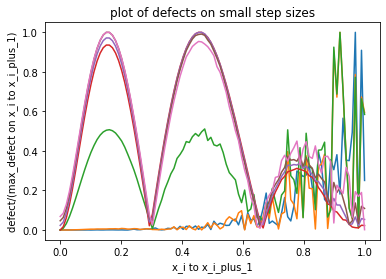

0.0
3.7947076036992655e-19
6.516055056637882e-17
1.7143404751340796e-14
7.3293229124749e-12
6.580503503217372e-12
4.432954003874556e-12
2.6558165389101163e-12
2.4751281579860063e-10
9.639318510057393e-11
2.418447386798306e-11
2.6603719227580314e-14
8.08819677899919e-12
1.156738593799389e-11
1.3862494485650245e-11
1.5847045897743328e-11
1.7757323389488988e-11
1.964930995690395e-11
2.1548707263008282e-11
2.3417046079998727e-11
2.5300012085338608e-11
2.7173929773027794e-11
2.9034608051148325e-11
3.0893954061639306e-11
3.27279314760176e-11
3.456451791450377e-11
3.639738510585744e-11
3.82144316191102e-11
4.0023651060039356e-11
4.182321156065427e-11
4.361988548140516e-11
4.539646436541034e-11
4.7162440619530344e-11
4.890804428114848e-11
5.065414754312769e-11
5.237249522949128e-11
5.4095727897163215e-11
5.580819140149629e-11
5.749711817770731e-11
5.915734568873177e-11
6.081757319975623e-11
6.245359784884386e-11
6.4086624895765e-11
6.569378374621238e-11
6.729239387937014e-11
6.886136105777041e

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

nsteps = 285
nsuccessful_steps = 185
integration complete


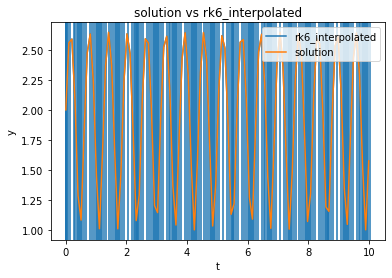

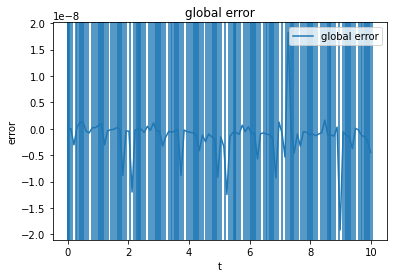

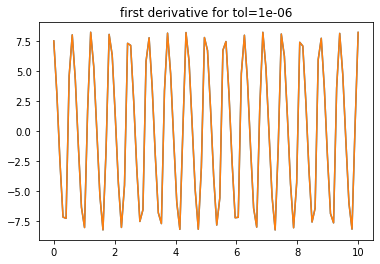

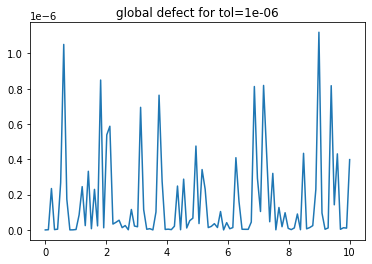

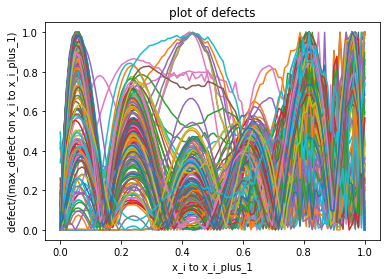

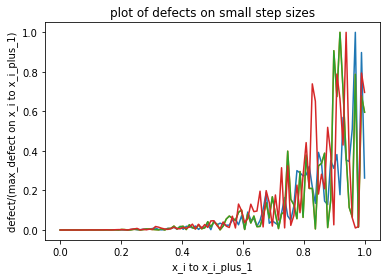

0.0
0.0
0.0
4.440892098500626e-16
0.0
4.440892098500626e-16
6.661338147750939e-15
1.7497114868092467e-13
3.2521985104949636e-10
4.0080339047676716e-10
1.0354122004230248e-09
1.2396275117509958e-09
1.467738375282579e-09
1.521480719191004e-09
1.1477179207020072e-09
9.281595492183214e-10
1.1822609558009844e-10
1.6500445454425972e-10
2.258322417958425e-10
2.4102009277271463e-10
2.83953749402599e-10
5.19946530275206e-10
6.189557755220676e-10
7.413902824993102e-10
8.679670315814292e-10
8.508120874495262e-10
5.31506394452208e-10
4.3816550387987263e-10
4.749491910871484e-10
4.2318681892083987e-10
2.963851386539318e-12
3.574029960873304e-12
7.37099270509134e-12
3.135767201456474e-10
3.751747801317151e-10
4.576370393749585e-10
4.974771705690273e-10
3.3783020825239873e-10
1.8963297598872941e-10
3.772113732480875e-10
4.136584408342969e-10
3.8120173684319525e-11
1.4784617974328285e-11
1.0279577189464817e-10
1.21891163828991e-10
1.4655032742894036e-10
2.0343016160495608e-10
2.0968005109978094e-10
5.

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

nsteps = 15
nsuccessful_steps = 15
integration complete


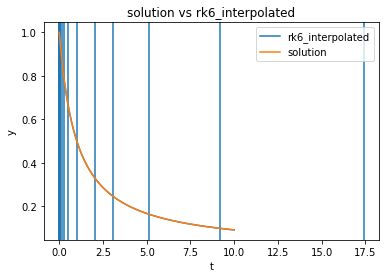

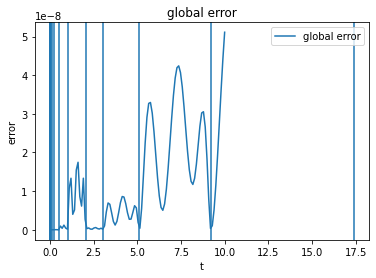

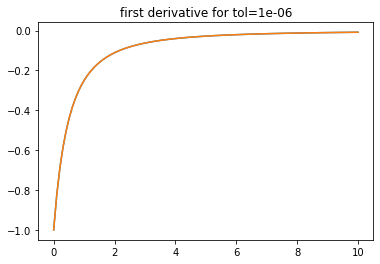

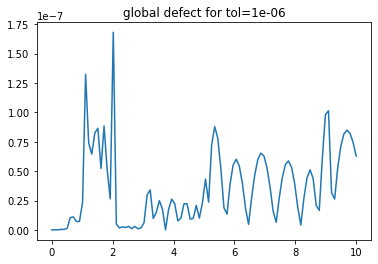

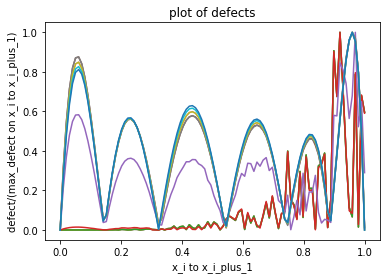

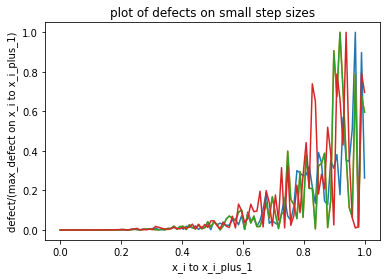

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
2.220446049250313e-16
1.5543122344752192e-15
1.2212453270876722e-15
4.773959005888173e-15
4.052314039881821e-15
2.270406085358445e-14
1.9290125052862095e-14
3.444466933899548e-14
3.690103778097864e-14
2.854660952067434e-14


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

nsteps = 15
nsuccessful_steps = 15
integration complete


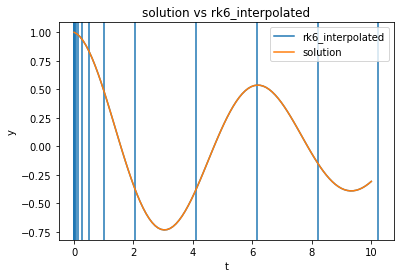

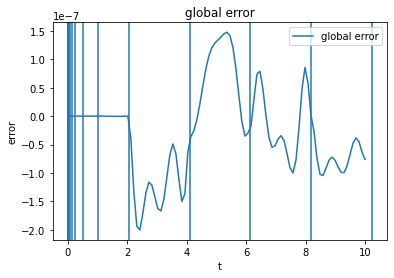

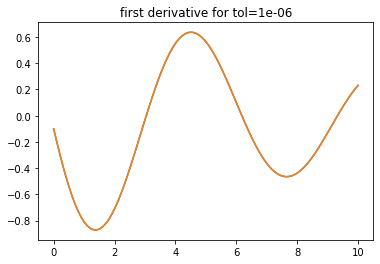

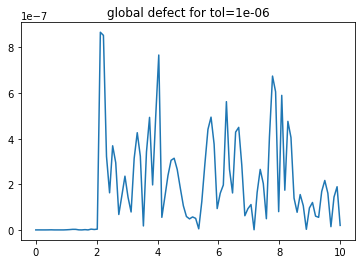

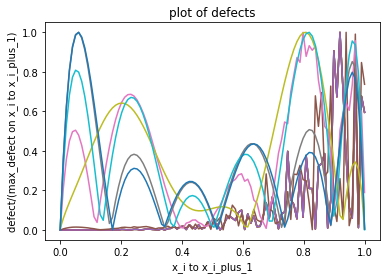

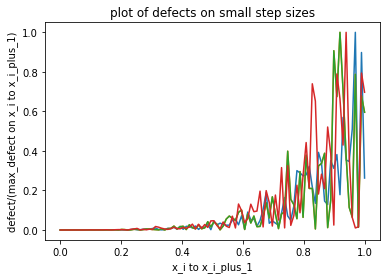

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
7.771561172376096e-16
1.3322676295501878e-15
4.4797499043625066e-14
1.0586143073254561e-11
3.715587032493417e-08
1.9386313221403384e-08
7.280599179093628e-10
1.9003893514391024e-08


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

nsteps = 21
nsuccessful_steps = 19
integration complete


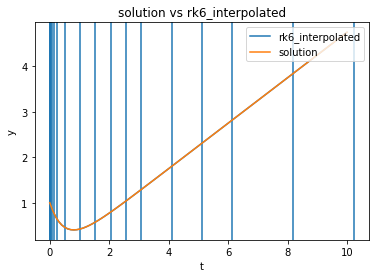

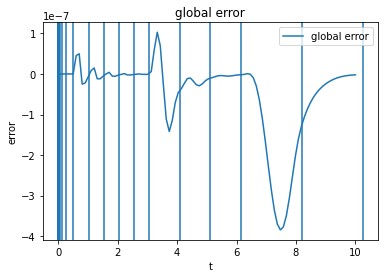

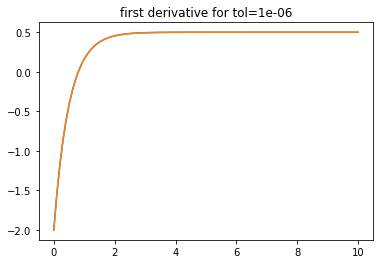

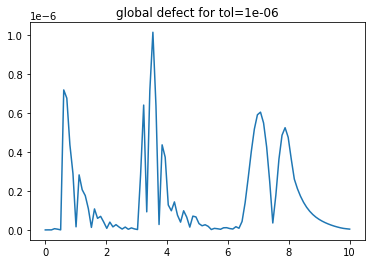

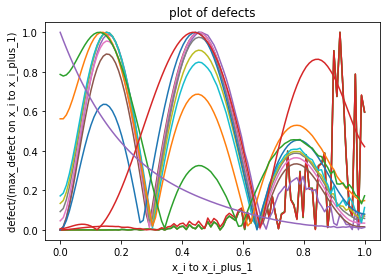

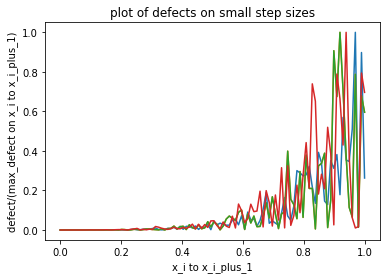

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
0.0
3.3306690738754696e-16
5.10702591327572e-15
2.6423307986078726e-14
1.6973311645074318e-11
6.989622935993367e-09
5.018490512043172e-09
2.7032744931432262e-09
1.2944605387588126e-09
5.811031655866827e-10
4.043608625714512e-08
1.0421680407546319e-08
2.0159691693777404e-09
1.272995220347184e-07
1.427368445661159e-09


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)